## Machine Learning Project - BIPxTech and Teamsystem

#### Importing libraries

In [1]:
import pandas as pd
import missingno as msno

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel('luiss_data_anonym.xlsx')

In [80]:
df.head()

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,...,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
0,1,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
1,2,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
2,3,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
3,4,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
4,5,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,...,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12


#### Data Preprocessing and EDA

In [81]:
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (134437, 45)


Displaying dataframe by parts

In [82]:
df.iloc[:5, :15]

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,H,Tdoc,VA,CE,DescrizioneRiga
0,1,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,MISSIONE INVALSI 5 MATEMATICA
1,2,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,VIAGGIO VACANZE 5
2,3,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,FINALMENTE IN SECONDARIA! 5
3,4,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,IN VACANZA CON PEPITO 3
4,5,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,TEORIA DELL'ISTITUZIONE E DELLA FONDAZIO


In [83]:
df.iloc[:5, 15:30]

,Importo,Iva,Conto,ContoStd,IvaM,Comp,Iva11,TM,%Forf,Art1,Valore1,Nomenclatura,Ritac,RF,%RIT1
0,3.22,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788873343202,NaN,NaN,NaN,0.0
1,6.20,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788842617013,NaN,NaN,NaN,0.0
2,21.06,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788847238299,NaN,NaN,NaN,0.0
3,9.50,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788876275432,NaN,NaN,NaN,0.0
4,11.38,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788822903631,NaN,NaN,NaN,0.0


In [84]:
df.iloc[:5, 30:45]

,%RIT2,CoDitta,RifNormativo,CMar,CTra,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
1,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
2,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
3,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
4,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12


In [85]:
#showing some basic inital statistics of the dataframe
df.describe()

,Unnamed: 0,Ateco,C,DataDoc,Importo,Conto,ContoStd,IvaM,Comp,Iva11,TM,%Forf,Ritac,%RIT1,%RIT2,CoDitta,TIva,Caus
count,134437.000000,134437.000000,8757.000000,134437,1.344370e+05,1.344370e+05,1.344370e+05,133966.000000,0.0,33813.000000,134437.000000,35.000000,731.000000,134437.000000,134437.000000,134437.000000,134437.000000,134437.000000
mean,92883.393783,471724.595521,85.027863,2022-06-13 12:00:02.249380352,8.322071e+02,5.791699e+06,5.791546e+06,318.052707,NaN,11.015231,5.867834,65.428571,34.452804,0.261976,0.001217,1011.985718,5.605994,9.061092
min,1.000000,11110.000000,1.000000,2020-01-09 00:00:00,-4.597515e+05,6.001000e+04,6.001000e+04,2.000000,NaN,1.000000,3.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,33640.000000,432101.000000,100.000000,2021-10-01 00:00:00,1.017000e+01,5.805125e+06,5.805125e+06,312.000000,NaN,9.000000,3.000000,60.000000,1.000000,0.000000,0.000000,59.000000,1.000000,1.000000
50%,67249.000000,471920.000000,100.000000,2022-08-31 00:00:00,3.800000e+01,5.810005e+06,5.810005e+06,324.000000,NaN,9.000000,7.000000,60.000000,3.000000,0.000000,0.000000,187.000000,1.000000,1.000000
75%,200892.000000,479110.000000,100.000000,2023-03-28 00:00:00,2.220000e+02,6.625015e+06,6.625005e+06,374.000000,NaN,9.000000,7.000000,60.000000,101.000000,0.000000,0.000000,621.000000,11.000000,11.000000
max,234501.000000,960909.000000,100.000000,2023-09-29 00:00:00,4.000000e+06,9.999009e+06,9.515090e+06,722.000000,NaN,35.000000,20.000000,100.000000,155.000000,100.000000,9.190000,9311.000000,74.000000,344.000000
std,77319.811350,185302.130522,31.185055,NaN,1.784612e+04,1.436308e+06,1.436286e+06,77.258443,NaN,6.460074,3.462215,19.605350,47.522008,2.299054,0.102382,2164.447142,5.065301,28.471706


In [86]:
#showing description of the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134437 entries, 0 to 134436
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       134437 non-null  int64         
 1   A                134437 non-null  object        
 2   Ateco            134437 non-null  int64         
 3   B                134383 non-null  object        
 4   C                8757 non-null    float64       
 5   DataDoc          134437 non-null  datetime64[ns]
 6   D                134436 non-null  object        
 7   E                1795 non-null    object        
 8   F                1795 non-null    object        
 9   G                19 non-null      object        
 10  H                19 non-null      object        
 11  Tdoc             134437 non-null  object        
 12  VA               134437 non-null  object        
 13  CE               2091 non-null    object        
 14  DescrizioneRiga  133

In [87]:
#showing null values count for each column in dataframe
df.isna().sum()

Unnamed: 0              0
A                       0
Ateco                   0
B                      54
C                  125680
DataDoc                 0
D                       1
E                  132642
F                  132642
G                  134418
H                  134418
Tdoc                    0
VA                      0
CE                 132346
DescrizioneRiga       905
Importo                 0
Iva                     0
Conto                   0
ContoStd                0
IvaM                  471
Comp               134437
Iva11              100624
TM                      0
%Forf              134402
Art1                   48
Valore1                75
Nomenclatura       134416
Ritac              133706
RF                  79149
%RIT1                   0
%RIT2                   0
CoDitta                 0
RifNormativo        71485
CMar                  403
CTra                   84
Rev                  1657
CVia                    0
Rifamm             132846
X           

<AxesSubplot: >

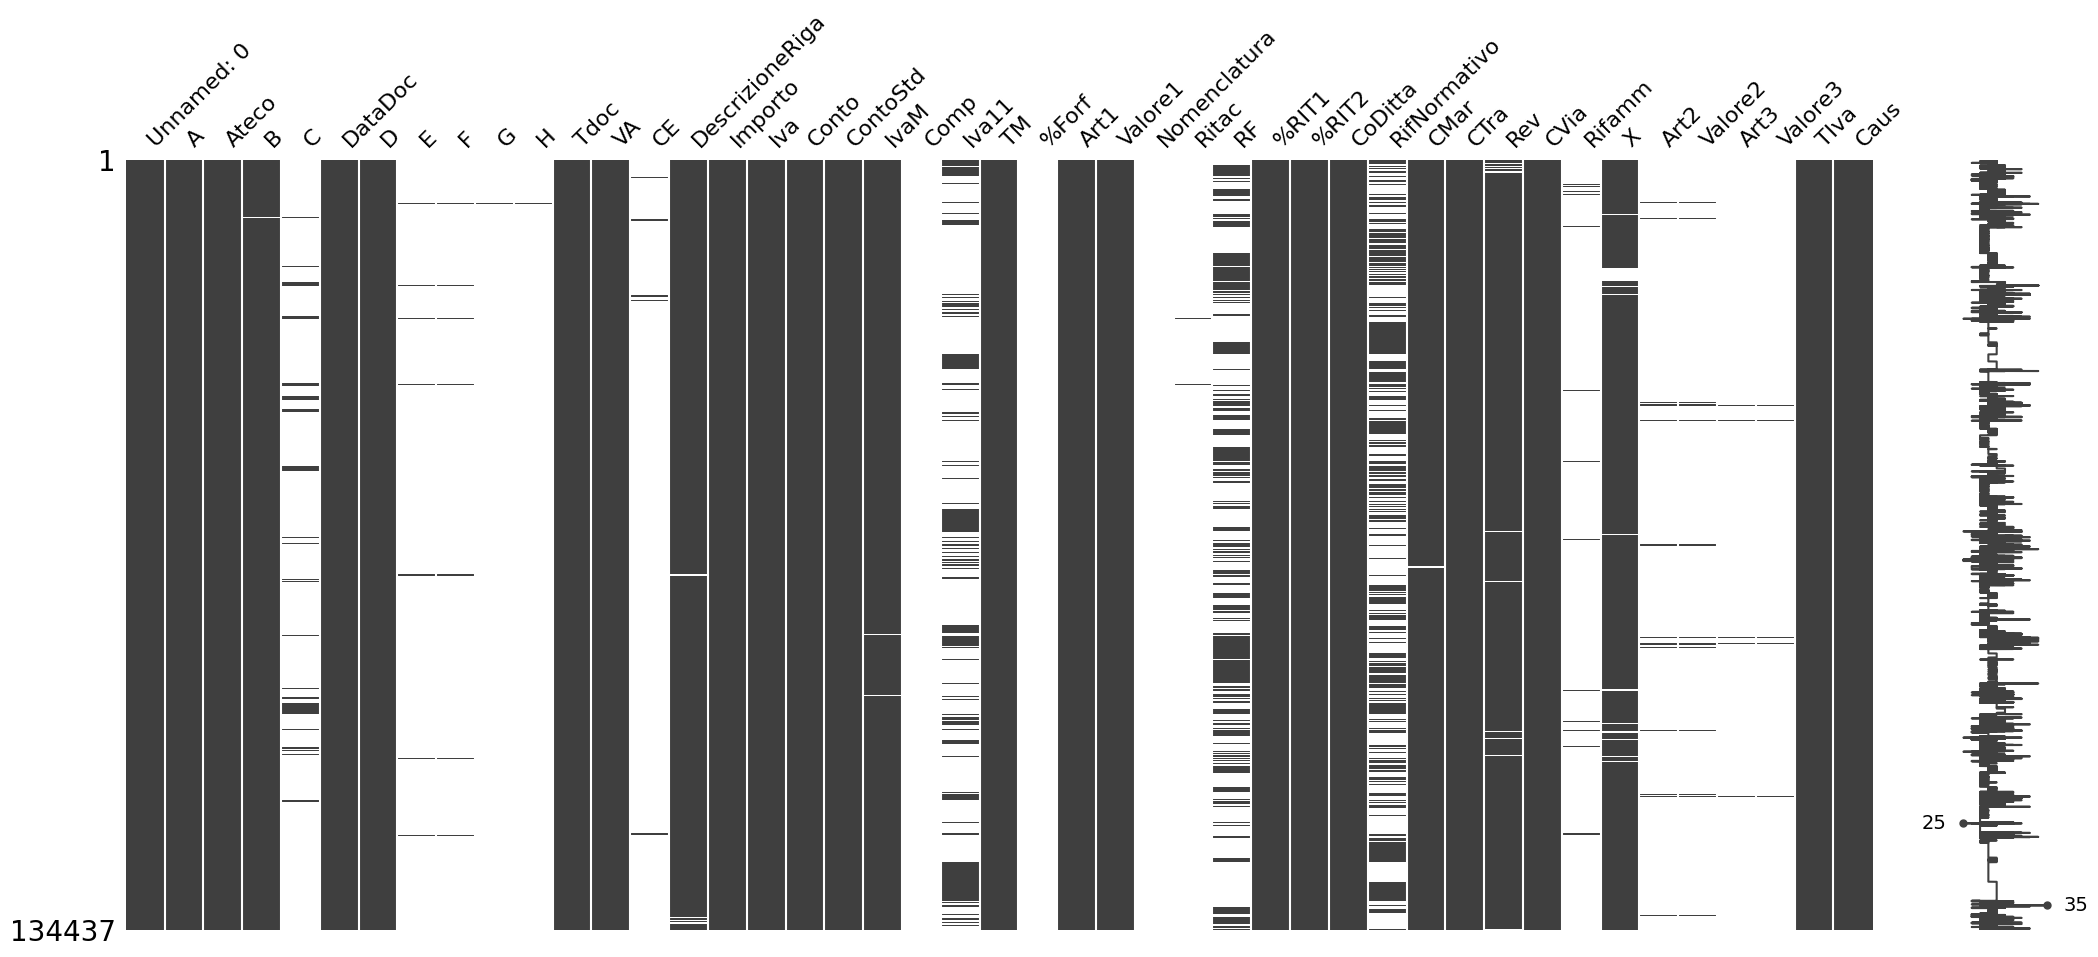

In [88]:
#showing null values visually with missingno library
%matplotlib inline
msno.matrix(df)

In [89]:
#dropping columns with more than 50% missing values 
df.drop(columns=['Unnamed: 0', 'C', 'E', 'F', 'G', 'H', 'CE', 'Comp', 'Iva11', '%Forf', 
                 'Nomenclatura', 'Ritac', 'RF', 'RifNormativo', 
                 'Rifamm', 'Art2', 'Valore2', 'Art3', 'Valore3'], inplace=True)

In [90]:
df

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,X,TIva,Caus
0,7,476220,N,2022-08-09,I,TD04,A,MISSIONE INVALSI 5 MATEMATICA,3.22,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
1,7,476220,N,2022-08-09,I,TD04,A,VIAGGIO VACANZE 5,6.20,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
2,7,476220,N,2022-08-09,I,TD04,A,FINALMENTE IN SECONDARIA! 5,21.06,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
3,7,476220,N,2022-08-09,I,TD04,A,IN VACANZA CON PEPITO 3,9.50,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
4,7,476220,N,2022-08-09,I,TD04,A,TEORIA DELL'ISTITUZIONE E DELLA FONDAZIO,11.38,N2.2,...,0.0,0.0,533,N,S,NaN,N,N,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134432,7,563000,N,2023-06-12,I,TD01,A,ACCREDITO CAUZIONI,-10.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134433,7,563000,N,2023-06-09,I,TD01,A,ADDEBITO CAUZIONI,120.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134434,7,563000,N,2023-06-09,I,TD01,A,ACCREDITO CAUZIONI,-150.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11
134435,7,563000,N,2023-06-06,I,TD01,A,ADDEBITO CAUZIONI,52.00,N1,...,0.0,0.0,62,N,N,N,N,B,11,11


In [91]:
#showing null values count again
df.isna().sum()

A                     0
Ateco                 0
B                    54
DataDoc               0
D                     1
Tdoc                  0
VA                    0
DescrizioneRiga     905
Importo               0
Iva                   0
Conto                 0
ContoStd              0
IvaM                471
TM                    0
Art1                 48
Valore1              75
%RIT1                 0
%RIT2                 0
CoDitta               0
CMar                403
CTra                 84
Rev                1657
CVia                  0
X                  4465
TIva                  0
Caus                  0
dtype: int64

<AxesSubplot: >

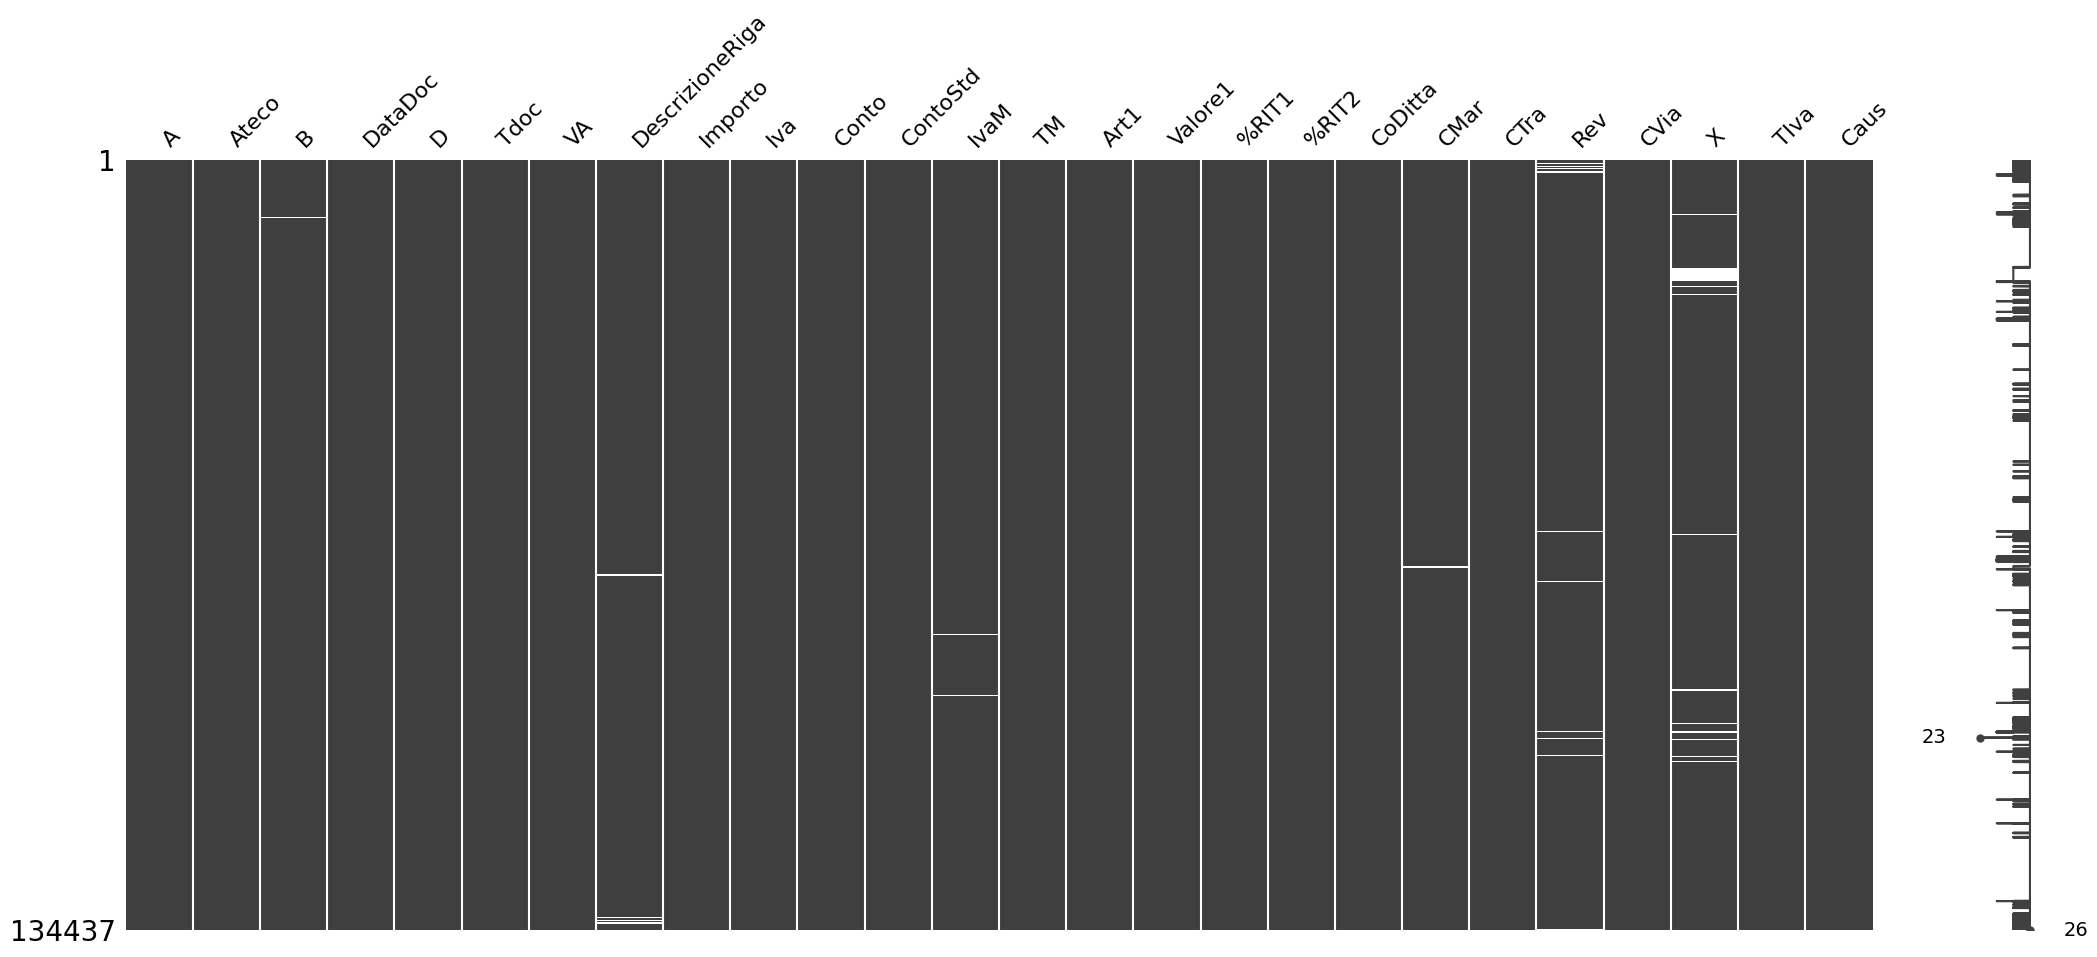

In [92]:
#checking the null values visually again
msno.matrix(df)

In [93]:
#number of unique for each column in dataframe
unique_counts = df.nunique()
print(unique_counts)

A                     13
Ateco                387
B                      5
DataDoc             1082
D                      3
Tdoc                  11
VA                     2
DescrizioneRiga    62567
Importo            22548
Iva                   24
Conto                707
ContoStd             365
IvaM                  60
TM                    12
Art1                 482
Valore1            44038
%RIT1                  8
%RIT2                  3
CoDitta              727
CMar                   4
CTra                   2
Rev                    2
CVia                   2
X                      3
TIva                  12
Caus                  38
dtype: int64


In [94]:
df['X'].unique()

array(['N', 'S', 'B', nan], dtype=object)

In [95]:
df['D'].unique()

array(['I', 'D', 'S', nan], dtype=object)

In [96]:
df['B'].unique()

array(['N', 'S', nan, 'C', 'X', 0], dtype=object)

In [97]:
df['Iva'].unique()

array(['N2.2', 'N1', 'N6.7', 'N3.4', 'N3.1', 'N3.2', 'N3.6', 'N4', 'N6.3',
       'N3.5', 'N6.1', 'N6.9', 'N6.6', 'N2', 'N2.1', 'N6.2', 'N5', 'N6',
       'N3', 'N6.8', 'N6.4', 'N3.3', 'N6.5', 'N7'], dtype=object)

In [98]:
df['IvaM'].unique()

array([374., 315., 302.,  22., 314., 323., 354., 307., 326., 346., 310.,
       300., 324., 341., 375., 381.,  nan, 327., 312., 306., 325., 347.,
       308., 339., 309., 301., 318., 377., 372., 336.,  10.,   2., 622.,
       376.,  35., 371., 321., 369., 304., 317., 340., 322., 350., 345.,
        23., 316., 222., 399., 370., 311., 379., 110., 329., 303., 722.,
       367., 358., 334., 355., 331., 356.])

In [ ]:
df['IvaM'] = df['IvaM'].astype('int32')

In [99]:
df_copy = df.copy()

In [100]:
df_1 = df.drop(columns = ['X'])

In [101]:
df_1 = df_1.dropna()

In [102]:
df_1.isnull().sum()

A                  0
Ateco              0
B                  0
DataDoc            0
D                  0
Tdoc               0
VA                 0
DescrizioneRiga    0
Importo            0
Iva                0
Conto              0
ContoStd           0
IvaM               0
TM                 0
Art1               0
Valore1            0
%RIT1              0
%RIT2              0
CoDitta            0
CMar               0
CTra               0
Rev                0
CVia               0
TIva               0
Caus               0
dtype: int64

In [103]:
df_1

,A,Ateco,B,DataDoc,D,Tdoc,VA,DescrizioneRiga,Importo,Iva,...,Valore1,%RIT1,%RIT2,CoDitta,CMar,CTra,Rev,CVia,TIva,Caus
12,7,476220,N,2022-08-08,I,TD01,A,GET THINKING. STUDENT'S BOOK AND WORKBOO,25.35,N2.2,...,9781108874960,0.0,0.0,533,N,N,N,N,11,11
13,7,476220,N,2022-08-08,I,TD01,A,SUCCEDE SEMPRE QUALCOSA DI MERAVIGLIOSO,13.51,N2.2,...,9788804729044,0.0,0.0,533,N,N,N,N,11,11
14,7,476220,N,2022-08-08,I,TD01,A,MATEMATICA.ROSSO PER LE SCUOLE SUPERIOR,29.09,N2.2,...,9788808339348,0.0,0.0,533,N,N,N,N,11,11
15,7,476220,N,2022-08-08,I,TD01,A,IT ENDS WITH US,11.31,N2.2,...,9788820072940,0.0,0.0,533,N,N,N,N,11,11
16,7,476220,N,2022-08-08,I,TD01,A,PIETRE PARLANO 2 CORSO DI STORIA,46.72,N2.2,...,9788858312711,0.0,0.0,533,N,N,N,N,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134432,7,563000,N,2023-06-12,I,TD01,A,ACCREDITO CAUZIONI,-10.00,N1,...,VCL-ACCREDITO,0.0,0.0,62,N,N,N,N,11,11
134433,7,563000,N,2023-06-09,I,TD01,A,ADDEBITO CAUZIONI,120.00,N1,...,VCL-ADDEBITO,0.0,0.0,62,N,N,N,N,11,11
134434,7,563000,N,2023-06-09,I,TD01,A,ACCREDITO CAUZIONI,-150.00,N1,...,VCL-ACCREDITO,0.0,0.0,62,N,N,N,N,11,11
134435,7,563000,N,2023-06-06,I,TD01,A,ADDEBITO CAUZIONI,52.00,N1,...,VCL-ADDEBITO,0.0,0.0,62,N,N,N,N,11,11


In [104]:
df_1 = df_1.drop(columns = ['DataDoc', 'DescrizioneRiga', 'Art1', 'Valore1'])

In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130824 entries, 12 to 134436
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   A         130824 non-null  object 
 1   Ateco     130824 non-null  int64  
 2   B         130824 non-null  object 
 3   D         130824 non-null  object 
 4   Tdoc      130824 non-null  object 
 5   VA        130824 non-null  object 
 6   Importo   130824 non-null  float64
 7   Iva       130824 non-null  object 
 8   Conto     130824 non-null  int64  
 9   ContoStd  130824 non-null  int64  
 10  IvaM      130824 non-null  float64
 11  TM        130824 non-null  int64  
 12  %RIT1     130824 non-null  float64
 13  %RIT2     130824 non-null  float64
 14  CoDitta   130824 non-null  int64  
 15  CMar      130824 non-null  object 
 16  CTra      130824 non-null  object 
 17  Rev       130824 non-null  object 
 18  CVia      130824 non-null  object 
 19  TIva      130824 non-null  int64  
 20  Caus    

#### ML Approach

###